## 1. DiamondPricesData
### Target variable: price
### Problem statement: predict the appropriate value of a diamond based on its characteristics

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
DiamondpricesData=pd.read_csv('DiamondpricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', DiamondpricesData.shape)

# Removing duplicate rows if any
DiamondpricesData=DiamondpricesData.drop_duplicates()
print('Shape After deleting duplicate values:', DiamondpricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondpricesData.head()

Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


<Axes: >

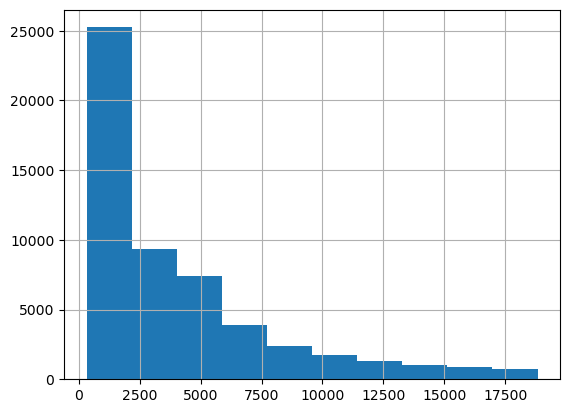

In [5]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
DiamondpricesData['price'].hist()

In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
DiamondpricesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
# Looking at the descriptive statistics of the data
DiamondpricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondpricesData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

In [10]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

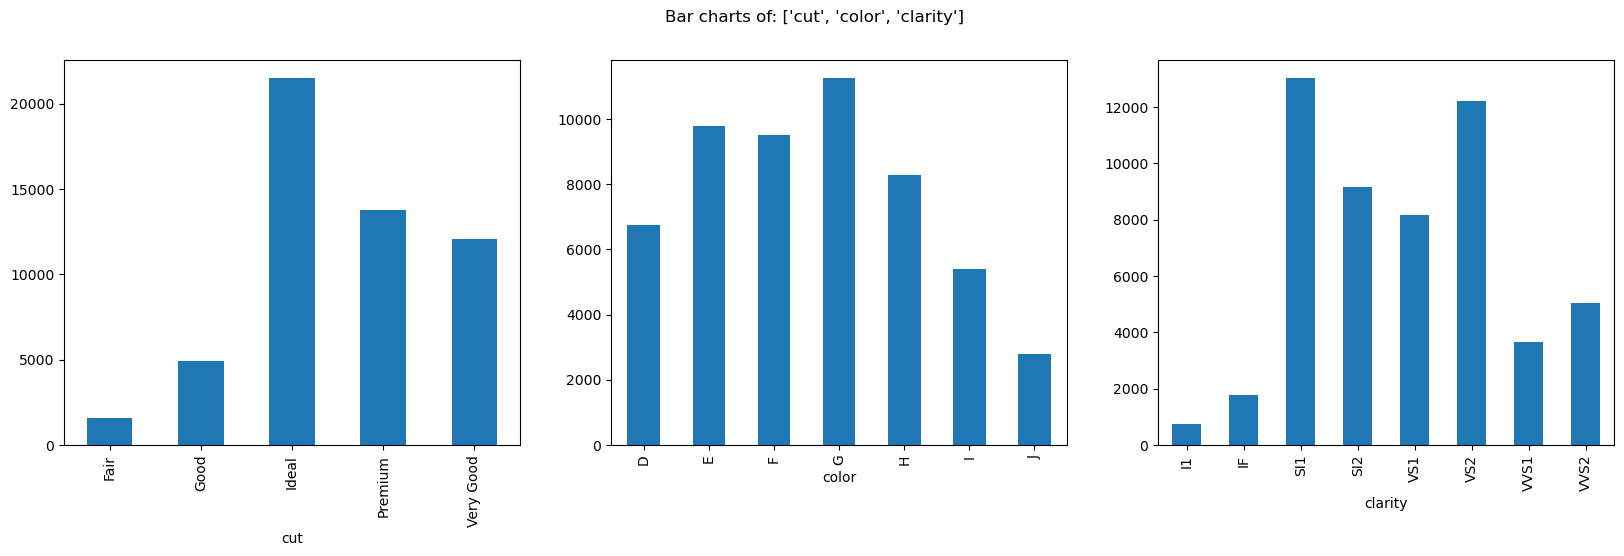

In [11]:
# Calling the function
PlotBarCharts(inpData=DiamondpricesData, colsToPlot=['cut', 'color', 'clarity'])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

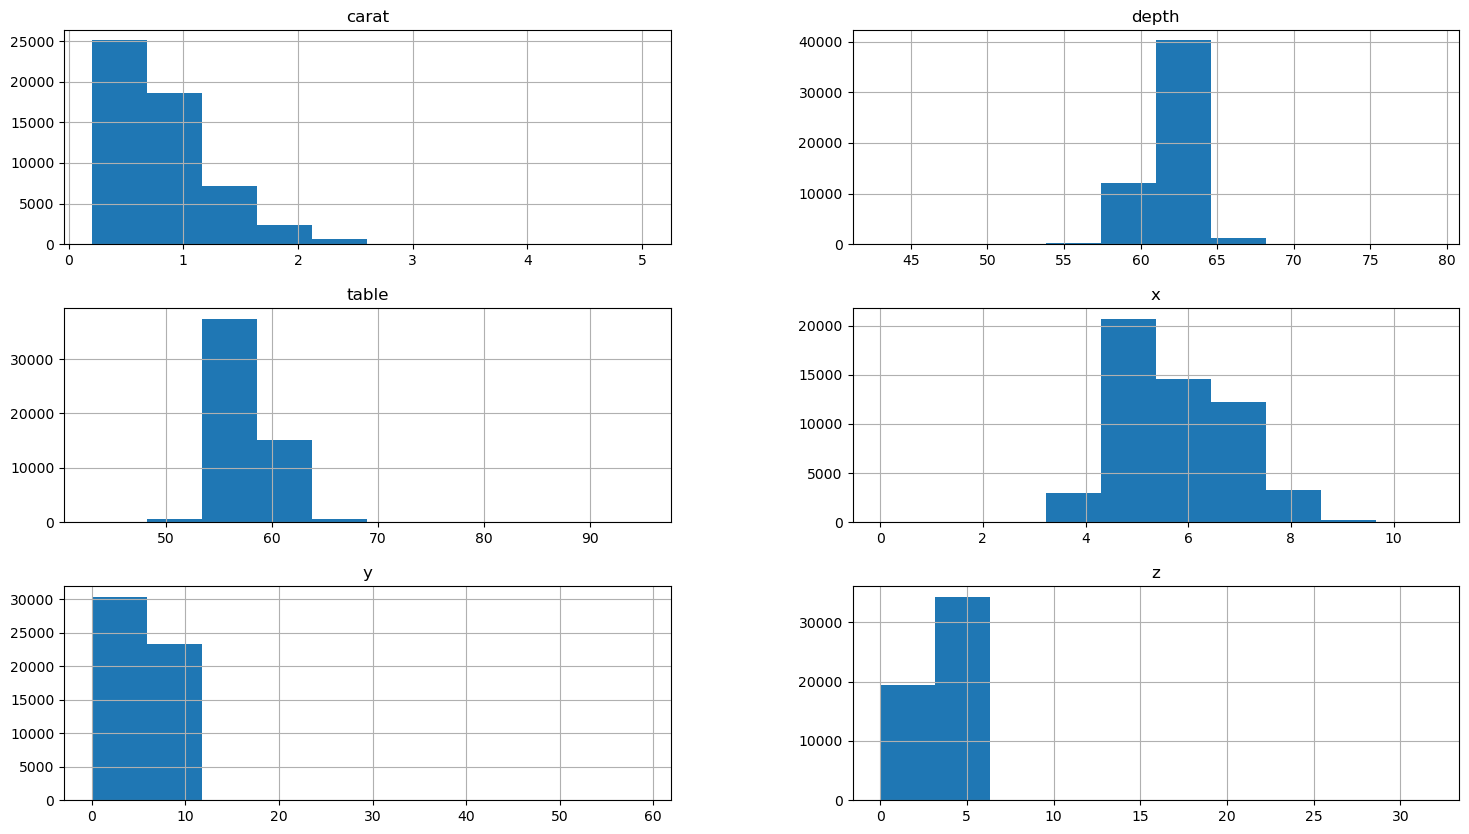

In [12]:
# Plotting histograms of multiple columns together
DiamondpricesData.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

In [13]:
# Finding nearest values to 2 mark
DiamondpricesData['x'][DiamondpricesData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [14]:
# Replacing outliers with nearest possibe value
DiamondpricesData['x'][DiamondpricesData['x']<3.73] =3.73

In [15]:
# Finding nearest values to 20 mark
DiamondpricesData['y'][DiamondpricesData['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
26243     0.00
11963     0.00
24520     0.00
15951     0.00
49556     0.00
Name: y, Length: 53792, dtype: float64

In [16]:
# Replacing outliers with nearest possibe value
DiamondpricesData['y'][DiamondpricesData['y']>20] =10.54

In [17]:
# Finding nearest values to 10 mark
DiamondpricesData['z'][DiamondpricesData['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
49556    0.00
4791     0.00
26123    0.00
5471     0.00
13601    0.00
Name: z, Length: 53793, dtype: float64

In [18]:
# Replacing outliers with nearest possibe value
DiamondpricesData['z'][DiamondpricesData['z']>8] =6.98

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

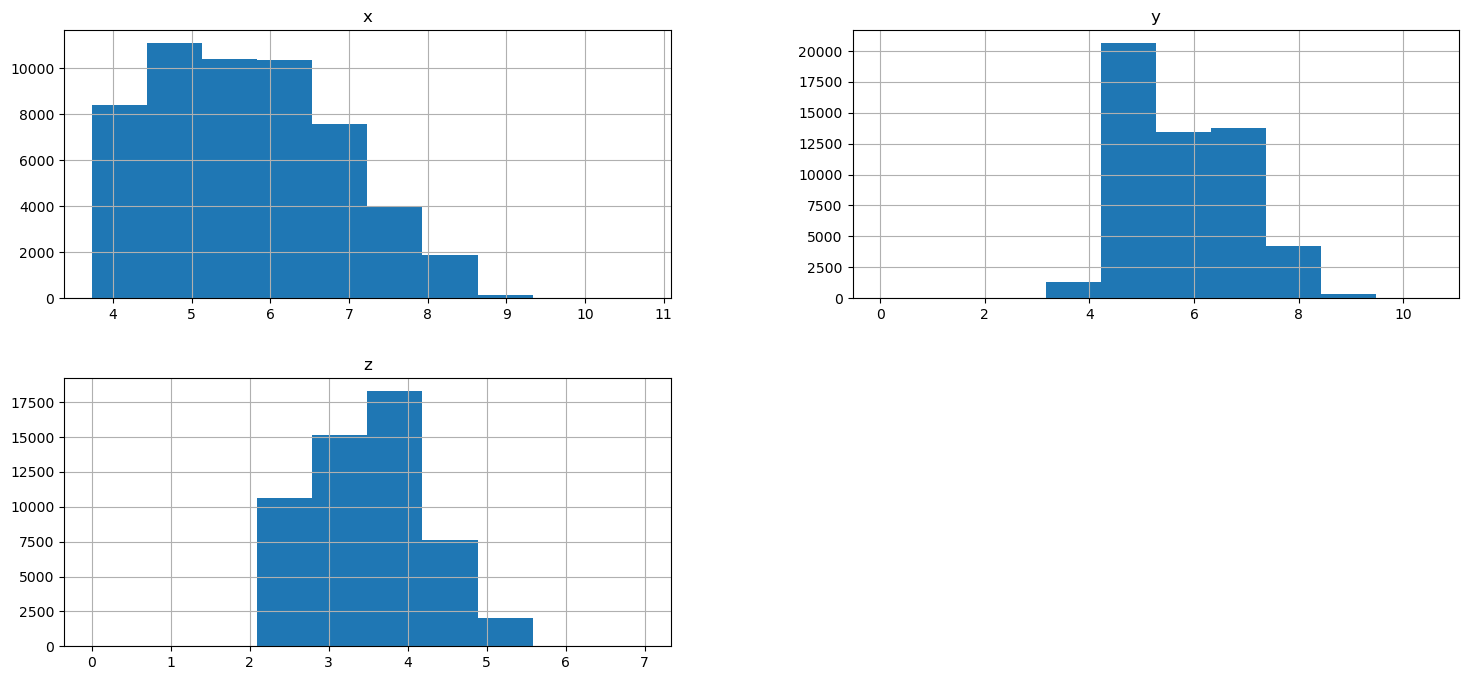

In [19]:
# Plotting the histogram
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

In [20]:
# Finding nearest value beyond 2
DiamondpricesData['y'][DiamondpricesData['y']>2].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    10.54
24067    10.54
Name: y, Length: 53788, dtype: float64

In [21]:
# Replacing outliers with nearest possibe value
DiamondpricesData['y'][DiamondpricesData['y']<2] =3.68

In [22]:
# Finding nearest value beyond 2
DiamondpricesData['z'][DiamondpricesData['z']>2].sort_values(ascending=True)

39246    2.06
31592    2.24
47138    2.25
31591    2.26
14       2.27
         ... 
27130    6.43
27630    6.72
24067    6.98
27415    6.98
48410    6.98
Name: z, Length: 53772, dtype: float64

In [23]:
# Replacing outliers with nearest possibe value
DiamondpricesData['z'][DiamondpricesData['z']<2] =2.06

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

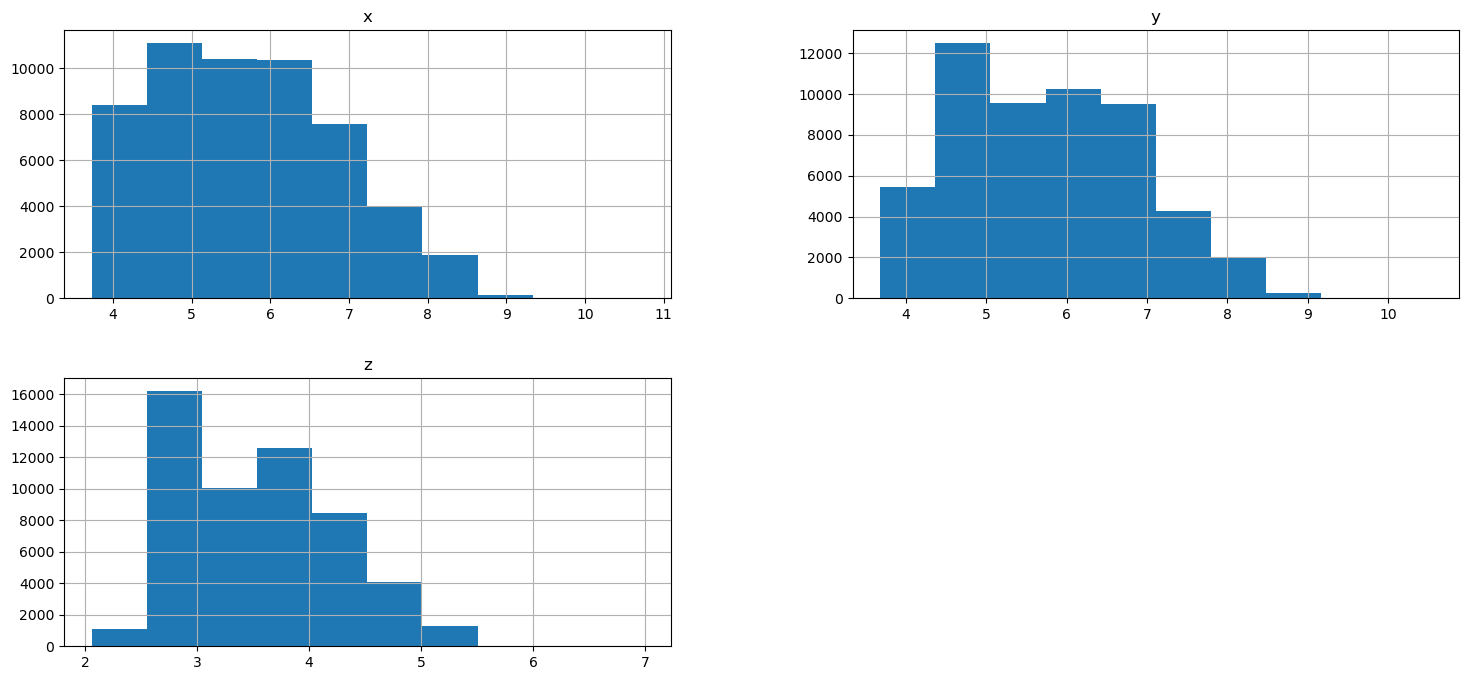

In [24]:
# Plotting the histogram
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

In [25]:
# Finding how many missing values are there for each column
DiamondpricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [26]:
# Replacing missing value for categorical data using MODE value
DiamondpricesData['color'].fillna(value=DiamondpricesData['color'].mode()[0], inplace=True)

In [27]:
# Replacing missing value for continuous data using median value
DiamondpricesData['depth'].fillna(value=DiamondpricesData['depth'].median(), inplace=True)

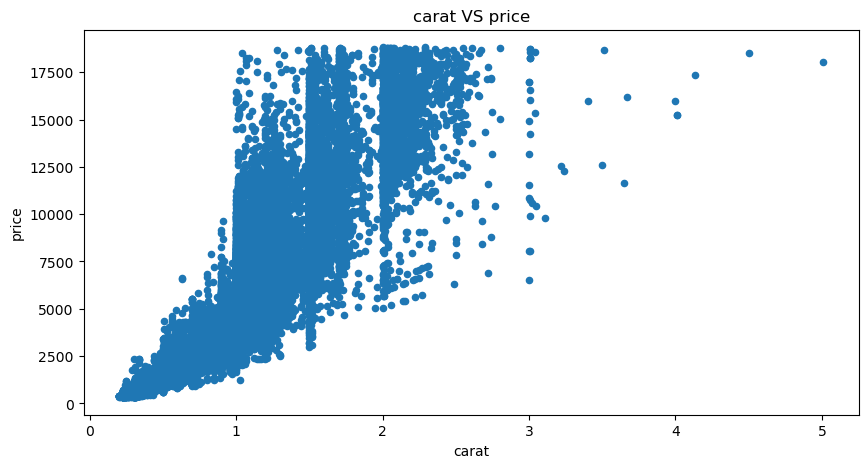

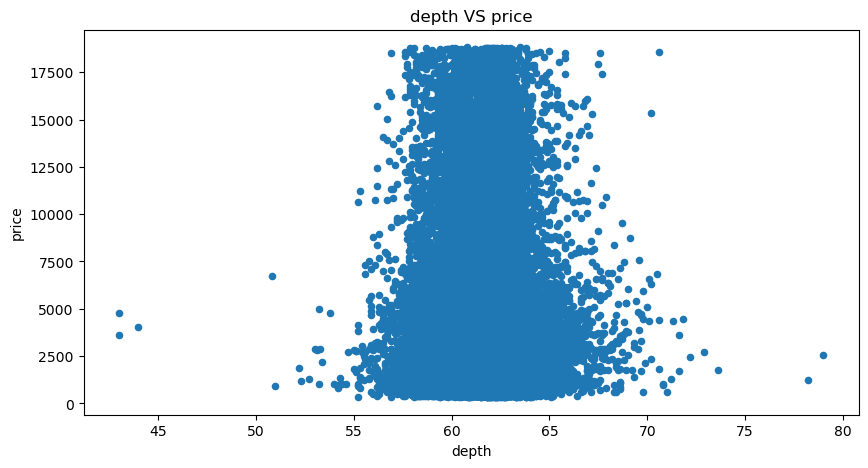

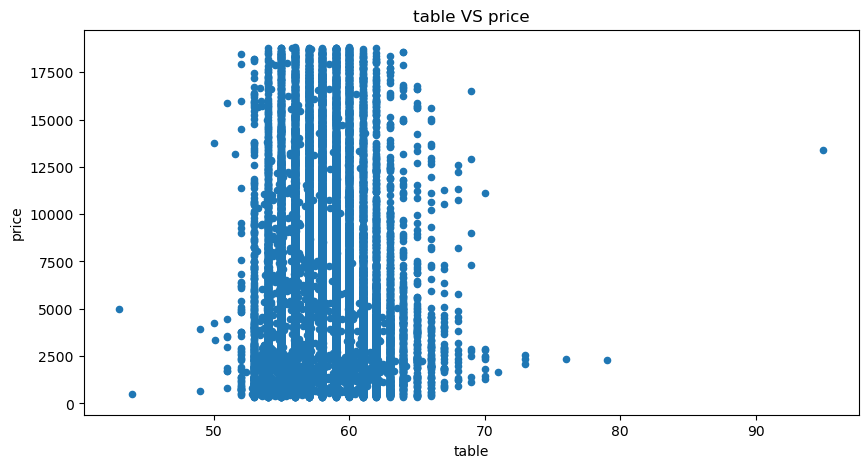

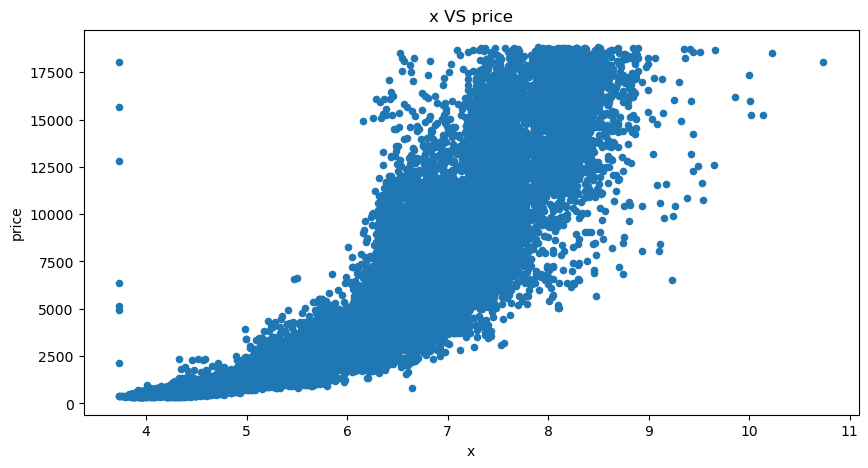

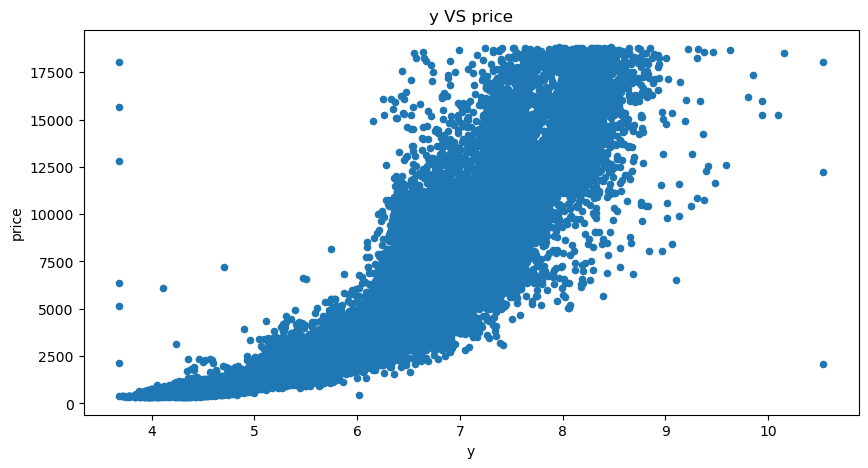

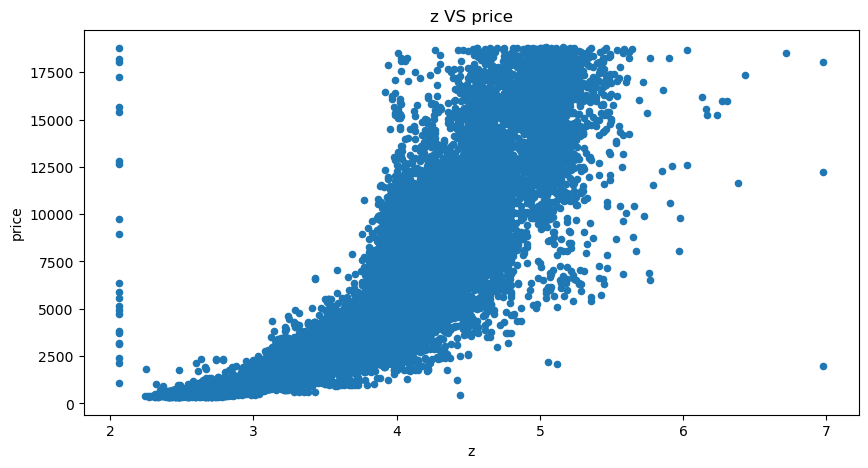

In [28]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [29]:
# Creating a data filter to remove outliers from data
DataFilter=(DiamondpricesData['z']>2.06) & (DiamondpricesData['z']<6.5)
DiamondpricesData=DiamondpricesData[DataFilter]

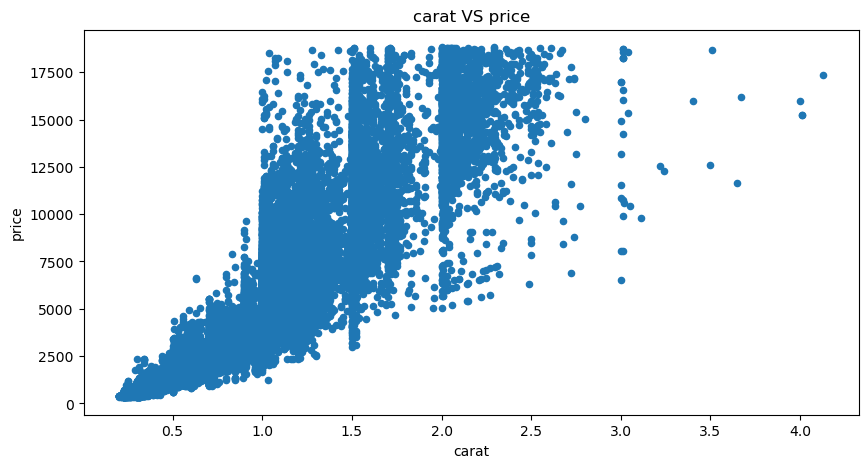

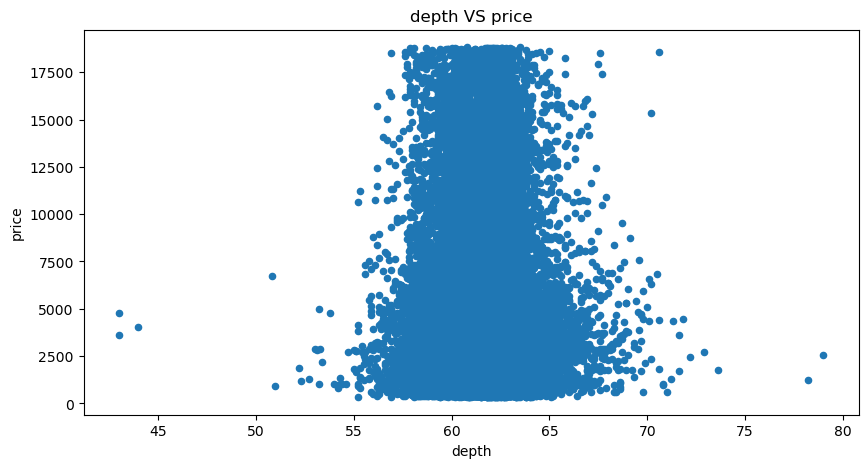

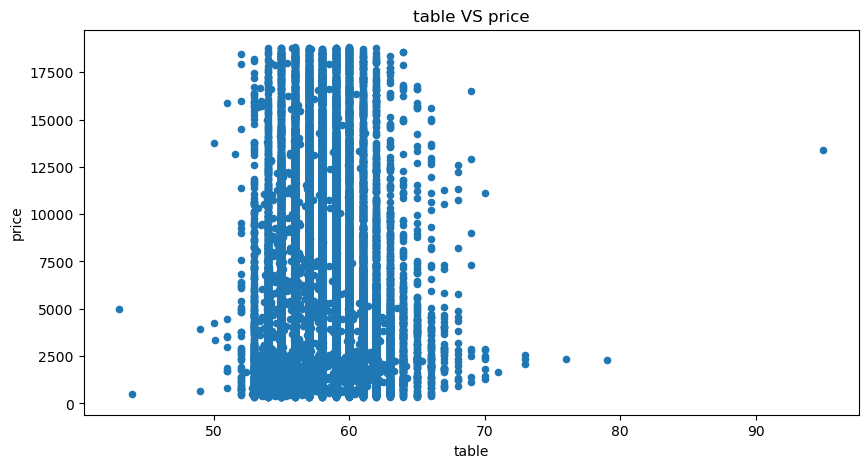

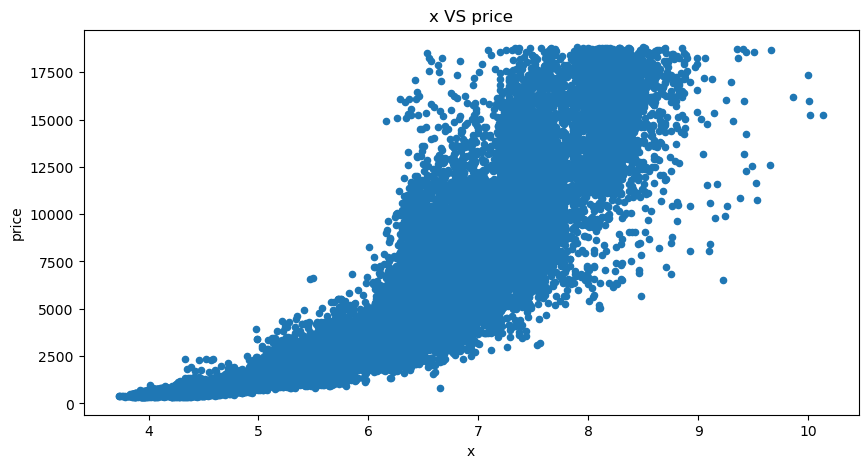

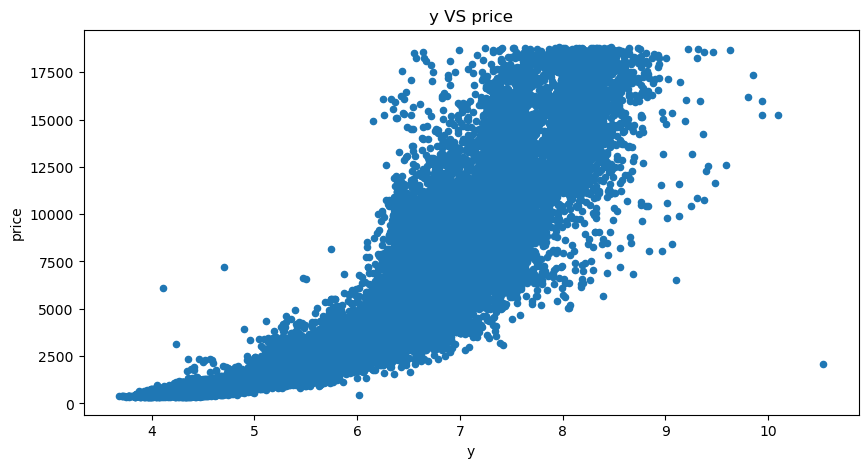

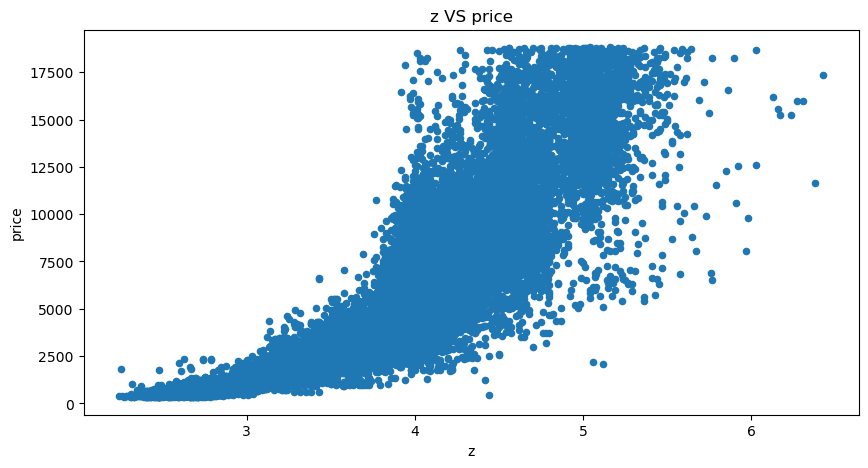

In [30]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [31]:
# Calculating correlation matrix
ContinuousCols=['price','carat', 'depth', 'table', 'x','y','z']

# Creating the correlation matrix
CorrelationData=DiamondpricesData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921845,-0.011424,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027212,0.181277,0.978136,0.977011,0.977179
depth,-0.011424,0.027212,1.000000,-0.297608,-0.025531,-0.028635,0.095916
table,0.126696,0.181277,-0.297608,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025531,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028635,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095916,0.154926,0.991574,0.991271,1.000000


In [32]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: price, dtype: float64

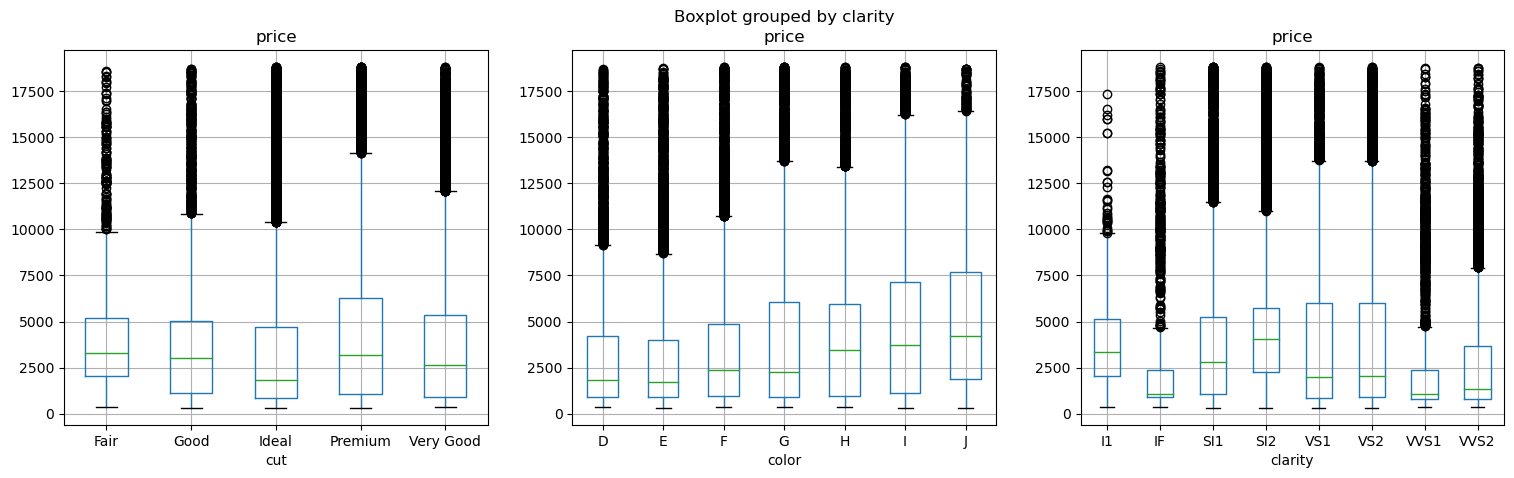

In [33]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondpricesData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [34]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [35]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=DiamondpricesData, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.41639003272117e-146
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.655076560414e-312


['cut', 'color', 'clarity']

In [36]:
SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

# Selecting final columns
DataForML=DiamondpricesData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [37]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [38]:
# Looking at unique values of ordinal column
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [39]:
# Replacing the ordinal values
DataForML['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [40]:
# Looking at unique values of ordinal column
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [41]:
# Replacing the ordinal values
DataForML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [42]:
# Looking at unique values of ordinal column
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [43]:
# Replacing the ordinal values
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [44]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=DiamondpricesData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


In [45]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

## Splitting the data into Training and Test Set

In [46]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization / Normalizantion

In [47]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37636, 7)
(37636,)
(16131, 7)
(16131,)


## Multiple Linear Regression

In [49]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8990644042515243

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          4265.0
1   3239          3589.0
2   6089          6015.0
3   9660          7284.0
4   2326          2614.0
Mean Accuracy on test data: 59.756150855485004
Median Accuracy on test data: 77.36475798797849

Accuracy values for 10-fold Cross Validation:
 [61.5205416  69.61187421 78.8435249  75.85682864 75.4520242  17.0499129
 29.69858832 41.33422654 56.13340688 65.1282487 ]

Final Average Accuracy of the model: 57.06


## Decision Trees

DecisionTreeRegressor(max_depth=10)
R2 Value: 0.9813787032743522

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3163.0
1   3239          3682.0
2   6089          6620.0
3   9660         10207.0
4   2326          2564.0
Mean Accuracy on test data: 90.67477970496336
Median Accuracy on test data: 92.82798292818705

Accuracy values for 10-fold Cross Validation:
 [81.20270103 84.77742434 84.29312733 81.35415296 77.47288333 81.22982401
 83.40707926 79.19333626 80.47751674 82.33114676]

Final Average Accuracy of the model: 81.57


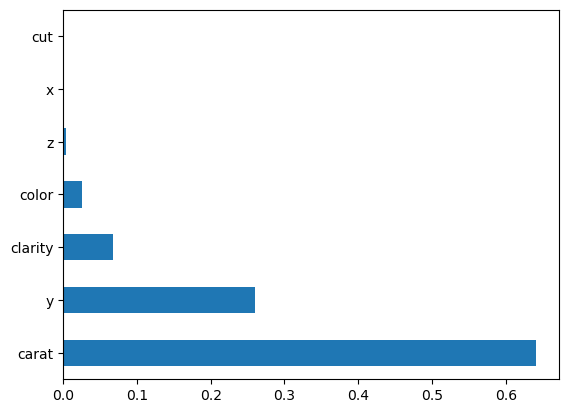

In [51]:
from sklearn.tree import DecisionTreeRegressor

# Define the DecisionTreeRegressor with the corrected criterion parameter
RegModel = DecisionTreeRegressor(max_depth=10, criterion='squared_error')

# Print all the parameters of Decision Tree
print(RegModel)

# Create the model on Training Data
DT = RegModel.fit(X_train, y_train)
prediction = DT.predict(X_test)

from sklearn import metrics
# Measure Goodness of fit on Training data
print('R2 Value:', metrics.r2_score(y_train, DT.predict(X_train)))

# Plot the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Print some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Print sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted'+TargetVariable]].head())

# Calculate the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['price'] - TestingDataResults['Predictedprice'])) / TestingDataResults['price'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Define a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Import cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Run 10-Fold Cross-validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


## Random Forest

RandomForestRegressor(max_depth=5)
R2 Value: 0.947071733172794

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3189.0
1   3239          3189.0
2   6089          7346.0
3   9660         10932.0
4   2326          2339.0
Mean Accuracy on test data: 84.22396260469796
Median Accuracy on test data: 87.75235531628533

Accuracy values for 10-fold Cross Validation:
 [73.78120063 82.01643042 80.13371735 73.41818777 77.91926218 79.27510536
 78.76575282 71.29363335 79.508301   78.90950483]

Final Average Accuracy of the model: 77.5


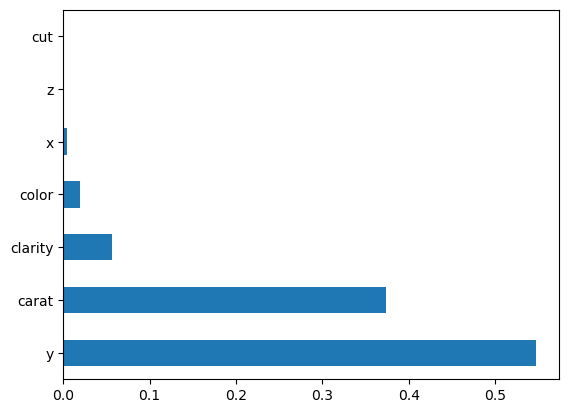

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Define the RandomForestRegressor with the corrected criterion parameter
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100, criterion='squared_error')

# Print all the parameters of Random Forest
print(RegModel)

# Create the model on Training Data
RF = RegModel.fit(X_train, y_train)
prediction = RF.predict(X_test)

from sklearn import metrics
# Measure Goodness of fit on Training data
print('R2 Value:', metrics.r2_score(y_train, RF.predict(X_train)))

# Plot the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Print some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Print sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted'+TargetVariable]].head())

# Calculate the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['price'] - TestingDataResults['Predictedprice'])) / TestingDataResults['price'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Define a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Import cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Run 10-Fold Cross-validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)
R2 Value: 0.9850984562279085

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3252.0
1   3239          3210.0
2   6089          6411.0
3   9660         10076.0
4   2326          2448.0
Mean Accuracy on test data: 91.33681237712001
Median Accuracy on test data: 93.34500875656742

Accuracy values for 10-fold Cross Validation:
 [81.79573001 85.76154285 84.82291061 81.81342765 78.3376783  81.13767
 84.33739501 81.3476882  81.4112439  82.09832688]

Final Average Accuracy of the model: 82.29


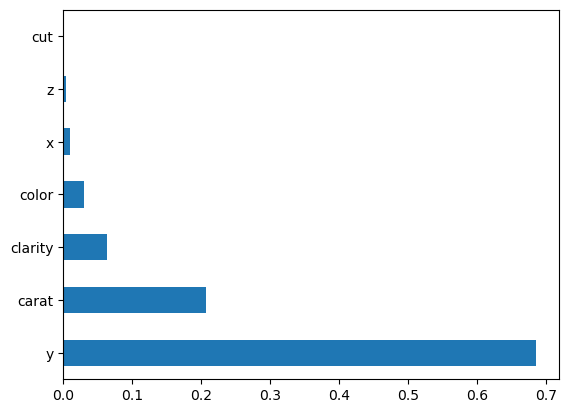

In [54]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9774120761155012

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3684.0
1   3239          3371.0
2   6089          6357.0
3   9660          8838.0
4   2326          2610.0
Mean Acc

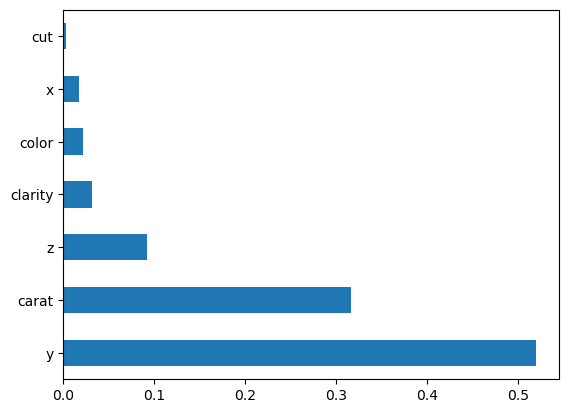

In [55]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [59]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.9851657974811846

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3422.0
1   3239          3310.0
2   6089          5906.0
3   9660          9823.0
4   2326          2538.0
Mean Accuracy on test data: 91.97696026007668
Median Accuracy on test data: 94.44199382443759

Accuracy values for 10-fold Cross Validation:
 [84.09429751 86.93775318 86.2052414  83.91565947 81.31511662 82.43757567
 83.89529592 83.11007518 83.66726245 84.49426444]

Final Average Accuracy of the model: 84.01


In [60]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['carat','y', 'color' , 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53767, 4)
(53767,)


## Step 1. Retraining the model using 100% data

In [61]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Training the model on 100% Data available
Final_KNN_Model=RegModel.fit(X,y)

## Cross validating the final model accuracy with less predictors

In [62]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_KNN_Model, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.98398157 86.88447515 86.3078534  83.83250964 81.4472221  80.44042237
 82.61553547 82.84644844 83.92036113 84.2092423 ]

Final Average Accuracy of the model: 83.65


## Step 2. Save the model as a serialized file which can be stored anywhere¶

pickle file of Predictive Model is saved at Location: C:\Users\koushik\A A Ivy ML DL Homework


## Step 3. Create a python function

In [64]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating ordinal variables
    # Replacing the ordinal values of color
    InputData['color'].replace({  'J':1, 
                                  'I':2,
                                  'H':3,
                                  'G':4,
                                  'F':5,
                                  'E':6,
                                  'D':7
                                 }, inplace=True)
    
    # Replacing the ordinal values for clarity
    InputData['clarity'].replace({'I1':1,
                                  'SI1':2,
                                  'SI2':3,
                                  'VS1':4,
                                  'VS2':5,
                                  'VVS1':6,
                                  'VVS2':7,
                                  'IF':8
                                 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['carat','y', 'color' , 'clarity']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)